In [1]:
#import required modules
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestRegressor

In [4]:
# Load the Blinkit dataset for analysis
df = pd.read_excel('Dataset/Blinkit_Grocery.xlsx')

In [5]:
# Displaying first 5  rows
df.head(50)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [6]:
# Displying info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
# describing the dataset
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
# Checking for Missing Values
pd.isnull(df).sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
# 7th step : Dropping and Saving the null values 

df['Outlet_Size'] = df['Outlet_Size'].fillna('Unknown')
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

# Exploratory Data Analysis(EDA)

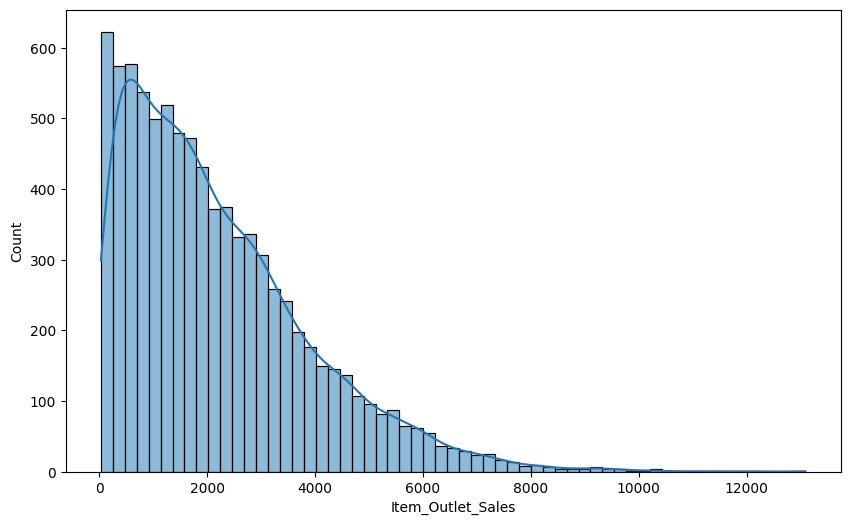

In [10]:
# This helps identify if sales data is normally distributed or skewed.
plt.figure(figsize=(10,6))
sns.histplot(df['Item_Outlet_Sales'], kde=True)
plt.show()

From above graphs we can see that Sales data is right-skewed, indicating that 
most items have low sales, with a few outliers.

# Identifying Top Selling Items 

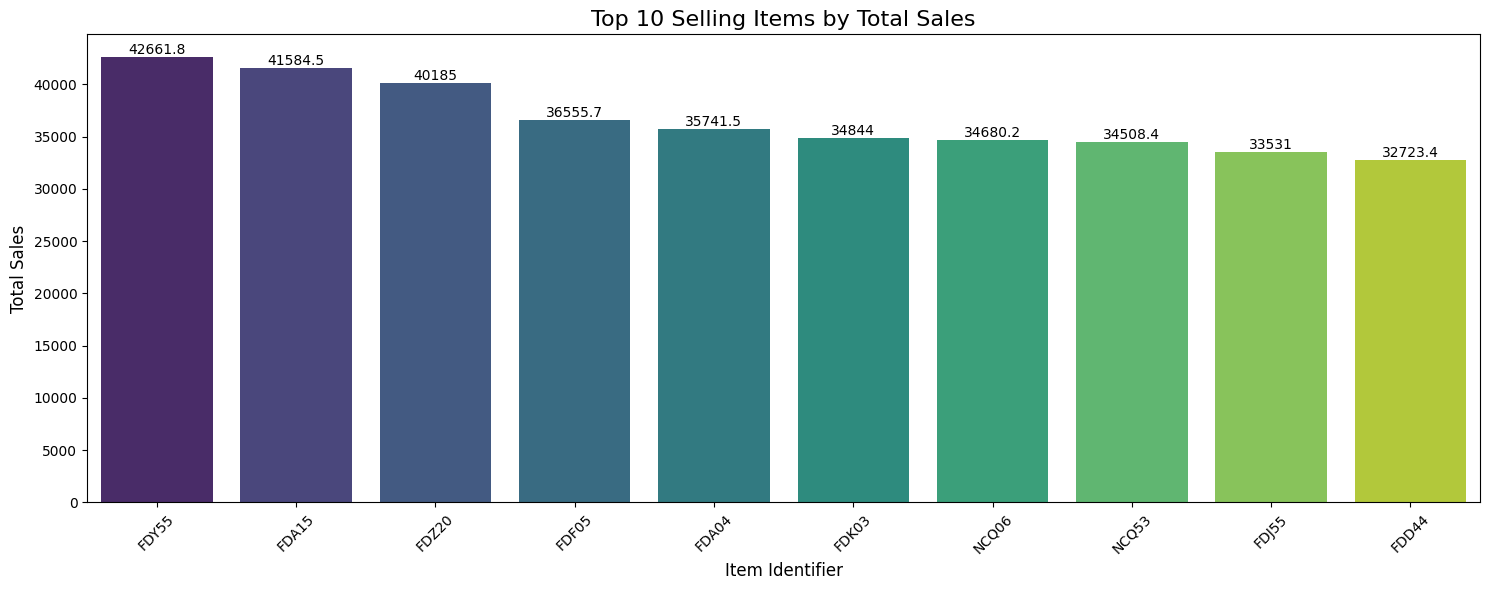

In [12]:
# Identifying Top Selling Items
# Group by 'Item_Identifier' and sum 'Item_Outlet_Sales' to find the total sales per item
top_selling_items = (df.groupby(['Item_Identifier'], as_index=False)['Item_Outlet_Sales']
                       .sum()
                       .sort_values(by='Item_Outlet_Sales', ascending=False)
                       .head(10))

plt.figure(figsize=(15, 6))
plt.clf()
ax = sns.barplot(x='Item_Identifier', y='Item_Outlet_Sales', data=top_selling_items, palette='viridis')

ax.set_title('Top 10 Selling Items by Total Sales', fontsize=16)
ax.set_xlabel('Item Identifier', fontsize=12)
ax.set_ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)

for bars in ax.containers:
    ax.bar_label(bars)

plt.tight_layout()
plt.show()

From above graphs we can see that the Top Selling Items with the Identifiers are: 
FDY55, FDA15, FDZ20, FDF05, FDA04, FDK03, NCQ06, NCQ53, FDJ55 and FD44

# Calculate and Analyze Outlet Age

In [13]:
from datetime import datetime
current_year = datetime.now().year  # Automatically fetches the current year

In [14]:
df['Outlet_Age'] = current_year - df['Outlet_Establishment_Year']

In [15]:
print(df['Outlet_Age'].describe())

count    8523.000000
mean       26.168133
std         8.371760
min        15.000000
25%        20.000000
50%        25.000000
75%        37.000000
max        39.000000
Name: Outlet_Age, dtype: float64


The dataset contains data for 8,523 outlets.
The youngest outlet is 15 years old, while the oldest is 39 years old.
The majority of outlets are relatively mature (20–37 years old).
    Older outlets (37+ years) may represent well-established locations, which could be leveraged for strategies like branding or loyalty programs.


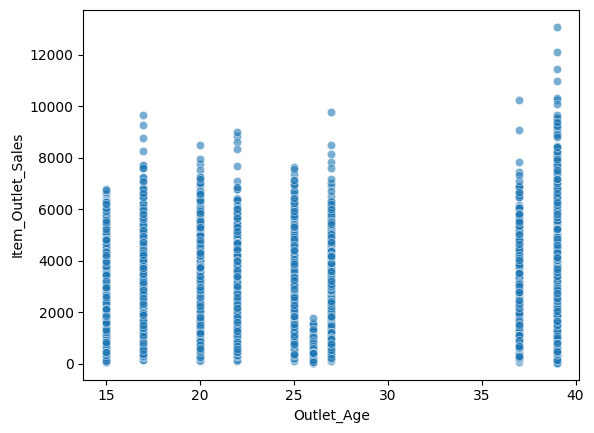

<Figure size 1000x600 with 0 Axes>

In [16]:
sns.scatterplot(x='Outlet_Age', y='Item_Outlet_Sales', data=df, alpha=0.6)
plt.figure(figsize=(10,6))
plt.show()

From the above scatter plot we can see that Sales are highly variable across all outlet ages, with no clear linear relationship between outlet age and sales.
Most outlets perform consistently within a range, but there are notable high-performing outliers above 8,000 sales.

Text(0, 0.5, 'Outlet Type')

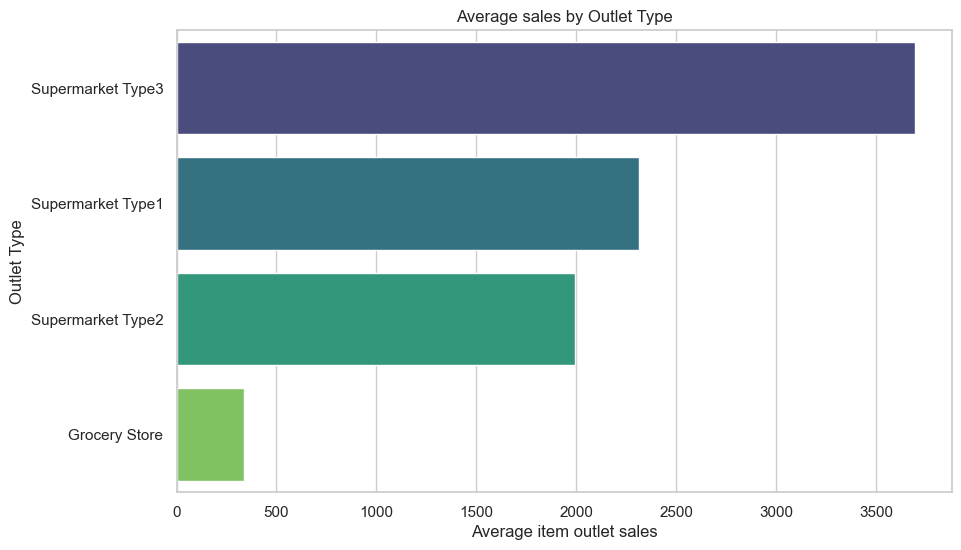

In [11]:
# Calculating average sales by outlate types
avg_sales_by_outlet = df.groupby(['Outlet_Type'], as_index = False)['Item_Outlet_Sales'].mean().sort_values(by ='Item_Outlet_Sales', ascending = False)
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x = 'Item_Outlet_Sales', y = 'Outlet_Type', data = avg_sales_by_outlet, palette ='viridis' )
plt.title('Average sales by Outlet Type')
plt.xlabel('Average item outlet sales')
plt.ylabel('Outlet Type')


The above bar plot reveals the average sales across different outlet types, 
helping to identify 'Supermarket Type3' generates the highest revenue on 
average.

#### Average Sales By Outlet Location

Text(0, 0.5, 'Outlet Location')

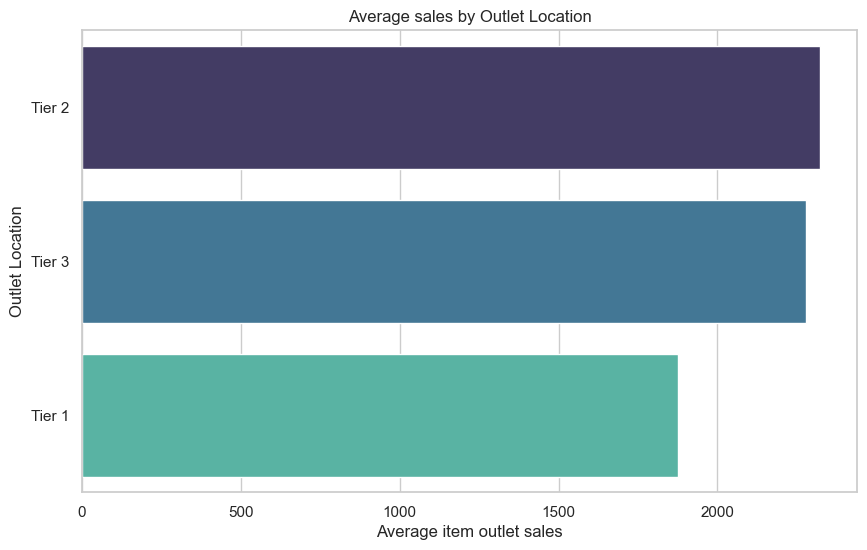

In [12]:
avg_sales_by_location= df.groupby(['Outlet_Location_Type'], as_index = False)['Item_Outlet_Sales'].mean().sort_values(by ='Item_Outlet_Sales', ascending = False)
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.barplot(x = 'Item_Outlet_Sales', y = 'Outlet_Location_Type', data = avg_sales_by_location, palette ="mako" )
plt.title('Average sales by Outlet Location')
plt.xlabel('Average item outlet sales')
plt.ylabel('Outlet Location')

The above bar plot compares the average sales across different outlet location
types.It highlights 'Tier 2' generates the highest average sales, providing 
insights intocustomer preferences based on geographic settings.

#### Distribution Of Item Fat Content

In [13]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Text(0.5, 1.0, 'Distribution of Item fat content')

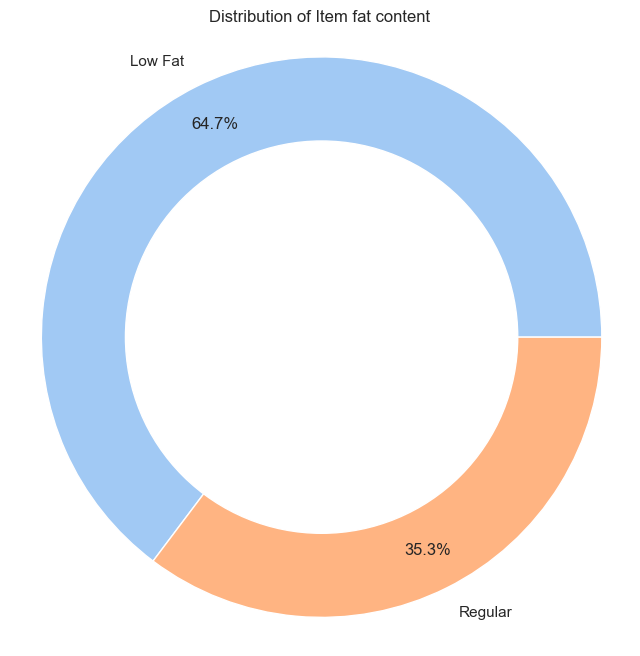

In [14]:
#Mapping to set label of correct data

fat_content_mapping = {
    'Low Fat': 'Low Fat',
    'Regular': 'Regular',
    'LF': 'Low Fat',
    'reg': 'Regular',
    'low fat': 'Low Fat'
}

# Replace the values in the Item_Fat_Content column
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(fat_content_mapping)
fat_content_counts = df['Item_Fat_Content'].value_counts()
labels = fat_content_counts.index
sizes = fat_content_counts.values
plt.figure(figsize=(8,8))
colors = sns.color_palette("pastel")
plt.pie(sizes, colors=colors, labels=labels,
        autopct='%1.1f%%', pctdistance=0.85)
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.axis('equal')
plt.title('Distribution of Item fat content')

In [ ]:
The pie chart shows A larger percentage of products arelabeled as Low Fat, 
suggesting a higher demand.

#### Analysing the age of the Outlets impact their sales

Text(0, 0.5, 'Average Sales')

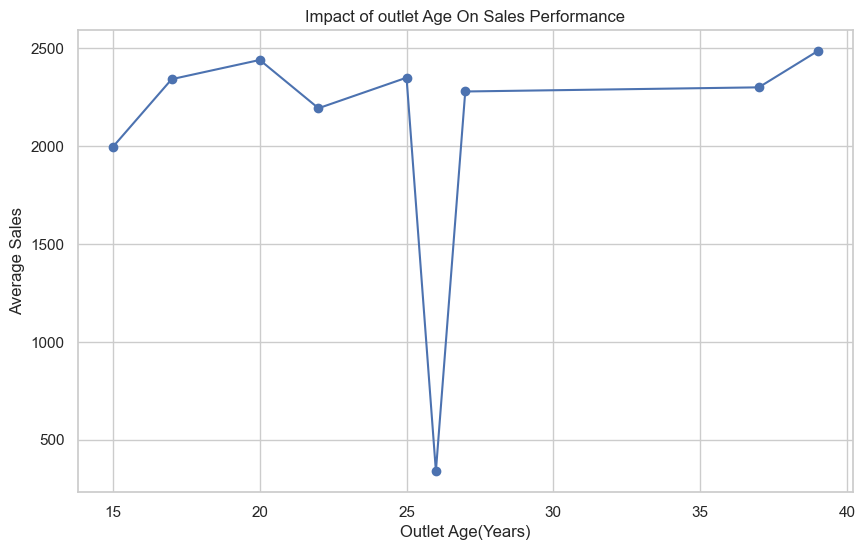

In [15]:
age_sales= df.groupby('outlet_Age')['Item_Outlet_Sales'].mean().reset_index()
plt.figure(figsize=(10,6))
plt.plot(age_sales['outlet_Age'], age_sales['Item_Outlet_Sales'], marker='o', linestyle='-' )
plt.title('Impact of outlet Age On Sales Performance')
plt.xlabel('Outlet Age(Years)')
plt.ylabel('Average Sales')

The plot reveals how sales performance correlates with the age of the outlets,
showing whether older outlets tend to have higher or more stable sales compared
to newer ones.

# Total sale by item type

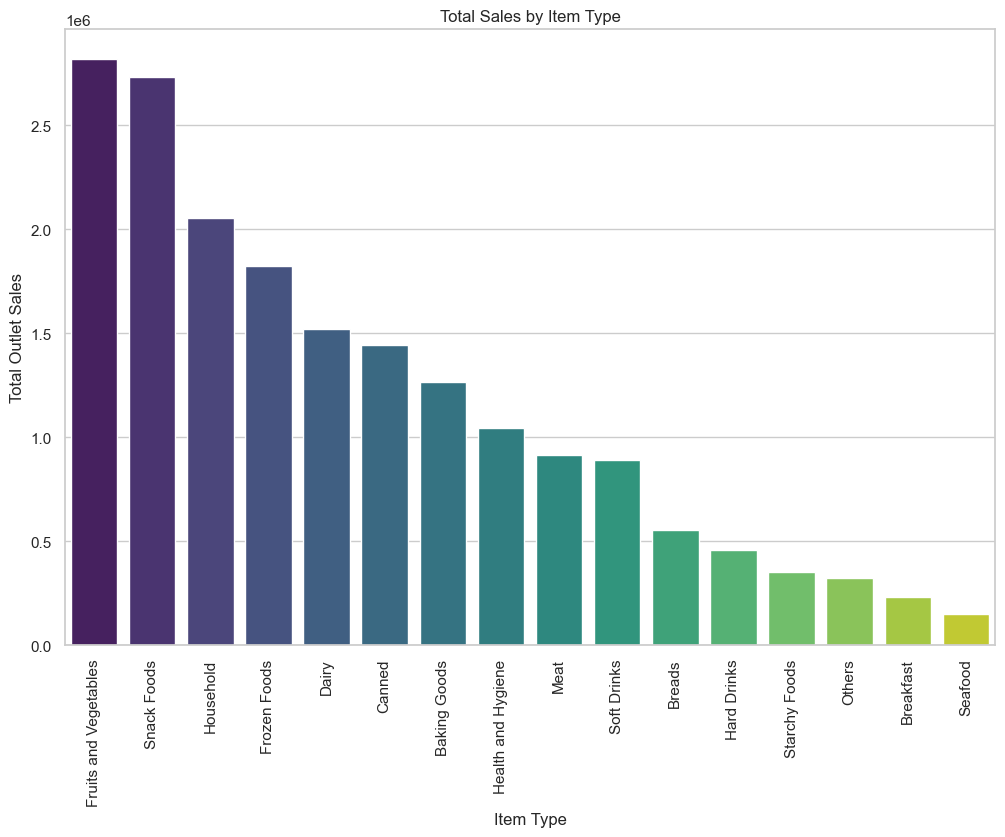

In [16]:
item_sales= df.groupby('Item_Type')['Item_Outlet_Sales'].sum().reset_index().sort_values(by ='Item_Outlet_Sales', ascending = False)



# Assuming 'item_sales' DataFrame is already created
# Plotting a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(data=item_sales, x='Item_Type', y='Item_Outlet_Sales', palette='viridis')

# Adding title and labels
plt.title('Total Sales by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Outlet Sales')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Display the plot
plt.show()


The chart identifies the top-selling item types are Fruits and Vegetables,
Snack Foods, Household, Frozen Foods, etc. providing insight into the most
profitable segments.

# Average MRP by item type

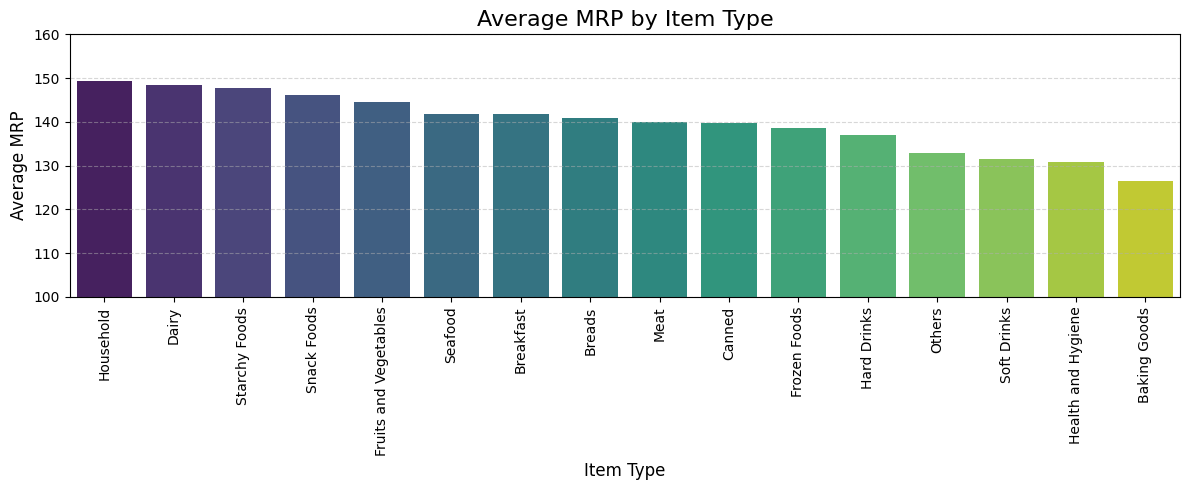

In [18]:
# Average MRP by Item Type
average_mrp = (df.groupby('Item_Type')['Item_MRP']
               .mean()
               .reset_index()
               .sort_values(by='Item_MRP', ascending=False))

# Plot configuration
plt.figure(figsize=(12, 5))
sns.barplot(data=average_mrp, x='Item_Type', y='Item_MRP', palette='viridis')

# Add value labels on the bars
for bars in ax.containers:
    ax.bar_label(bars, fmt='%.2f', fontsize=10, padding=3)

# Add title and axis labels
plt.title('Average MRP by Item Type', fontsize=16)
plt.xlabel('Item Type', fontsize=12)
plt.ylabel('Average MRP', fontsize=12)
plt.xticks(rotation=90)
plt.ylim(100, 160)  # Focus range for better comparison
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Certain item types(Household, Dairy, Starchy Foods, Snack Foods, Fruits and Vegetables etc.) show a significantly higher average MRP, indicating a preference for more premium or specialized items.


# Create Key Performance Indicators(KPIs) 

In [19]:
# Total number of transactions
total_transactions = df['Item_Outlet_Sales'].count()

# Top-selling item type by total sales
top_selling_item_type = df.groupby('Item_Type')['Item_Outlet_Sales'].sum().idxmax()

# Sales growth rate (example calculation; you would need date data)
# sales_growth_rate = ((current_period_sales - previous_period_sales) / previous_period_sales) * 100

# Top 5 highest MRP items
top_5_high_mrp = df.sort_values(by='Item_MRP', ascending=False).head(5)[['Item_Type', 'Item_MRP']]

# Displaying additional KPIs
print(f"Total Number of Transactions: {total_transactions}")
print(f"Top-Selling Item Type: {top_selling_item_type}")
print("\nTop 5 High-MRP Items:")
print(top_5_high_mrp)

Total Number of Transactions: 8523
Top-Selling Item Type: Fruits and Vegetables

Top 5 High-MRP Items:
               Item_Type  Item_MRP
4802              Canned  266.8884
5884              Canned  266.8884
4159               Dairy  266.6884
5254  Health and Hygiene  266.6884
4538              Canned  266.5884


Fruits and Vegetables is the top-selling item type, indicating strong consumer demand for these products.

Consider running promotions for Canned products, which have shown to be a significant contributor to sales.

# Impact of Item Weight on Sales

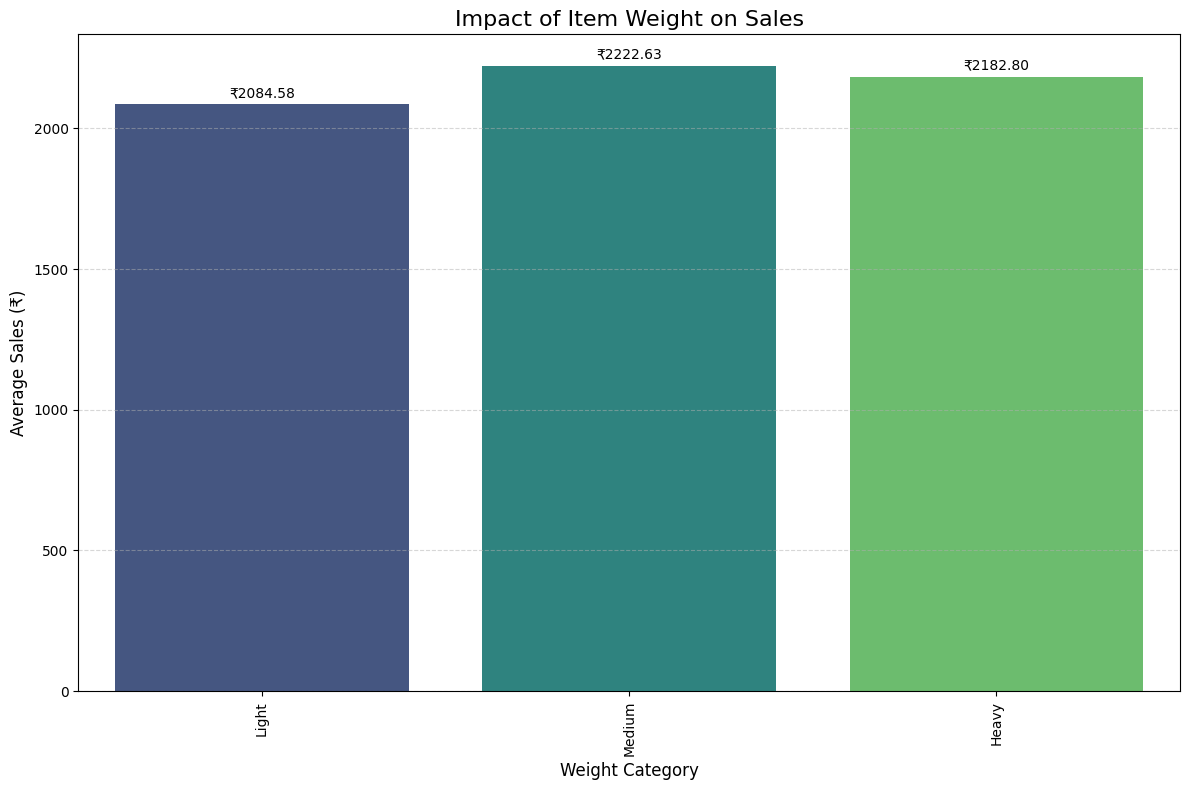

In [20]:
# Grouping items by weight categories
bins = [0, 10, 20, 30]
labels = ['Light', 'Medium', 'Heavy']
df['Weight_Category'] = pd.cut(df['Item_Weight'], bins=bins, labels=labels)

# Average sales by weight category
avg_sales_by_weight = df.groupby('Weight_Category')['Item_Outlet_Sales'].mean().reset_index()

# Plot configuration
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=avg_sales_by_weight, x='Weight_Category', y='Item_Outlet_Sales', palette='viridis')

# Add value labels on the bars
for bars in ax.containers:
    ax.bar_label(bars, fmt='₹%.2f', fontsize=10, padding=3)

# Add title and labels
plt.title('Impact of Item Weight on Sales', fontsize=16)
plt.xlabel('Weight Category', fontsize=12)
plt.ylabel('Average Sales (₹)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

The above bar plot shows that the Medium weight category shows the highest average sales, consider focusing on marketing and stocking more items in this weight range.
And Light or Heavy categories show lower average sales, evaluate product strategies to boost their performance, such as promotions or bundle offers.

# Total Sales by Outlet Size

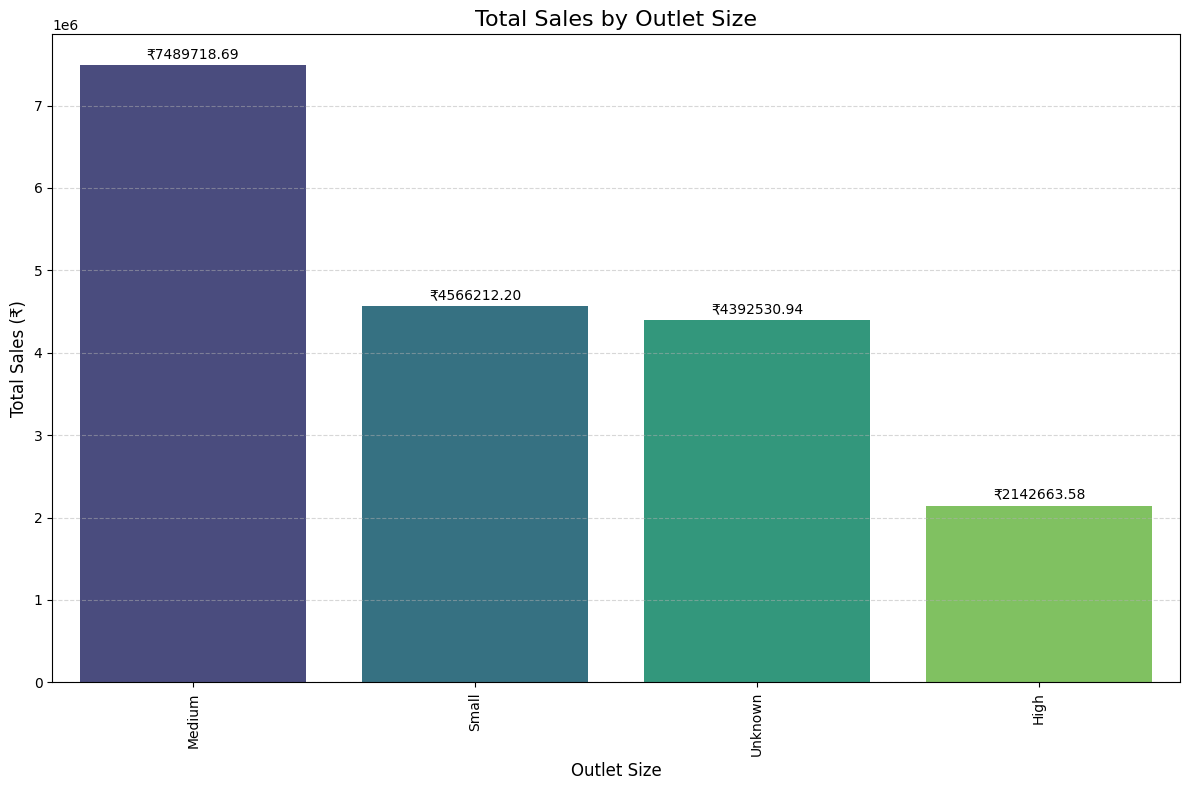

In [21]:
# Calculate total sales by outlet size
total_sales_by_outlet_size = (df.groupby(['Outlet_Size'], as_index=False)['Item_Outlet_Sales']
                             .sum()
                             .sort_values(by='Item_Outlet_Sales', ascending=False)
                             .head(10))

# Plot configuration
plt.figure(figsize=(12, 8))
ax = sns.barplot(data=total_sales_by_outlet_size, x='Outlet_Size', y='Item_Outlet_Sales', palette='viridis')

# Add value labels on the bars
for bars in ax.containers:
    ax.bar_label(bars, fmt='₹%.2f', fontsize=10, padding=3)

# Add title and labels
plt.title('Total Sales by Outlet Size', fontsize=16)
plt.xlabel('Outlet Size', fontsize=12)
plt.ylabel('Total Sales (₹)', fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


The above plot helps identify Medium outlet size contribute the most to total sales.
Medium outlet sizes are contributing significantly to total sales, consider expanding product variety and promotions in those outlets.
For Higher and smaller outlets show lower sales, analyze their unique challenges and find ways to optimize their performance (e.g., targeted marketing, exclusive products).

# Count of Items by Outlet Size

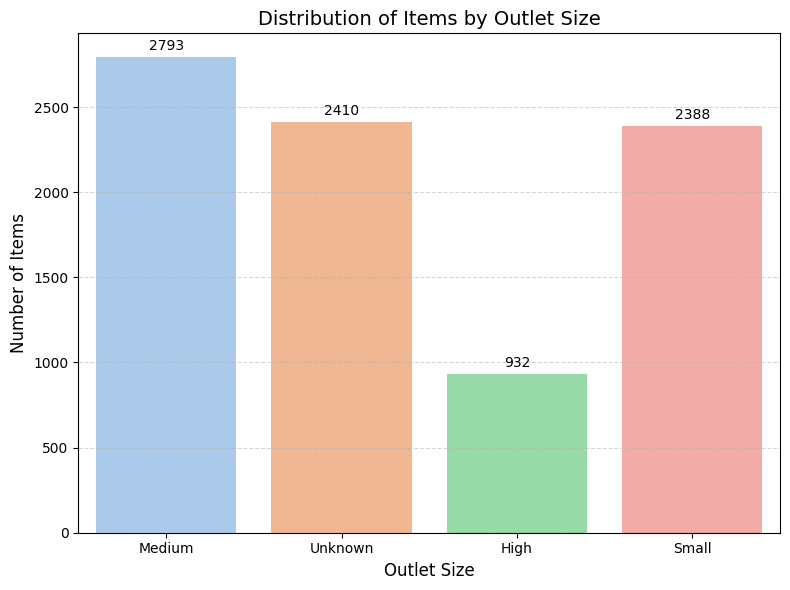

In [22]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='Outlet_Size', palette='pastel')

# Add value labels on the bars
for bars in ax.containers:
    ax.bar_label(bars, fmt='%d', fontsize=10, padding=3)

# Add title and labels
plt.title("Distribution of Items by Outlet Size", fontsize=14)
plt.xlabel("Outlet Size", fontsize=12)
plt.ylabel("Number of Items", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

The plot highlights how items are distributed among Small, Medium, and Large outlets.
The Higher outlet size consistently has fewer items, investigate whether it impacts sales or customer satisfaction.

# Feature Engineering

In [23]:
# Replace missing or zero values in Item_Weight with the mean
df['Item_Weight'] = df['Item_Weight'].replace(0, np.nan)
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

# Feature Engineering
df['Sales_Per_Item'] = df['Item_Outlet_Sales'] / df['Item_Weight']
df['Price_Per_Weight'] = df['Item_MRP'] / df['Item_Weight']

# Validation of the new features
print(df[['Sales_Per_Item', 'Price_Per_Weight']].describe())


       Sales_Per_Item  Price_Per_Weight
count     8523.000000       8523.000000
mean       191.521189         12.424336
std        170.578381          7.585058
min          2.263720          1.686016
25%         65.537459          6.871897
50%        144.990780         11.031752
75%        267.795411         15.781936
max       1628.784126         50.775731


Sales_Per_Item: Some items generate extremely high sales relative to their weight, making them high-performing. Investigate these items to understand what drives their success.

Price_Per_Weight: Items with exceptionally high Price_Per_Weight could represent premium products or potential overpricing.

# Observation for the Relationship Between Item MRP and Sales

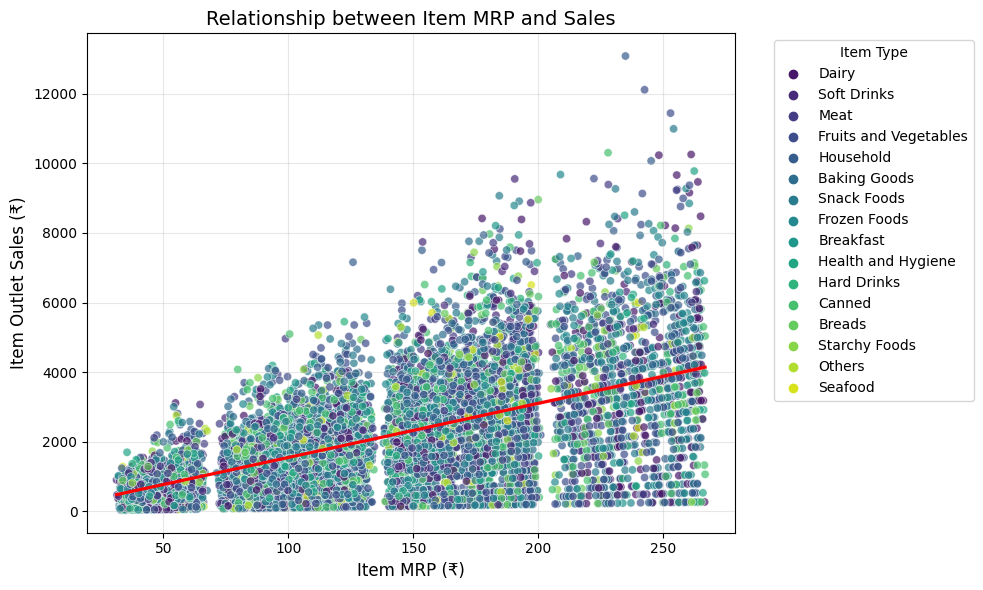

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=df, hue='Item_Type', alpha=0.7, palette='viridis')

# Adding trend line
sns.regplot(x='Item_MRP', y='Item_Outlet_Sales', data=df, scatter=False, color='red', line_kws={'label':'Trend Line'})

# Adding title and labels
plt.title('Relationship between Item MRP and Sales', fontsize=14)
plt.xlabel('Item MRP (₹)', fontsize=12)
plt.ylabel('Item Outlet Sales (₹)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Item Type')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

The scatter plot with a trend line demonstrates that There's a positive correlation between Item_MRP and Item_Outlet_Sales, indicating that higher-priced items generate higher sales.

Higher MRPs (₹200–₹250) show a wider range of sales, including some of the highest sales (₹12,000+).
tems like Dairy, Soft Drinks, and Frozen Foods are spread across different price ranges, while other categories, like Seafood, are less frequent.

# Observation for the Relationship Between Item_Visibility and Sales

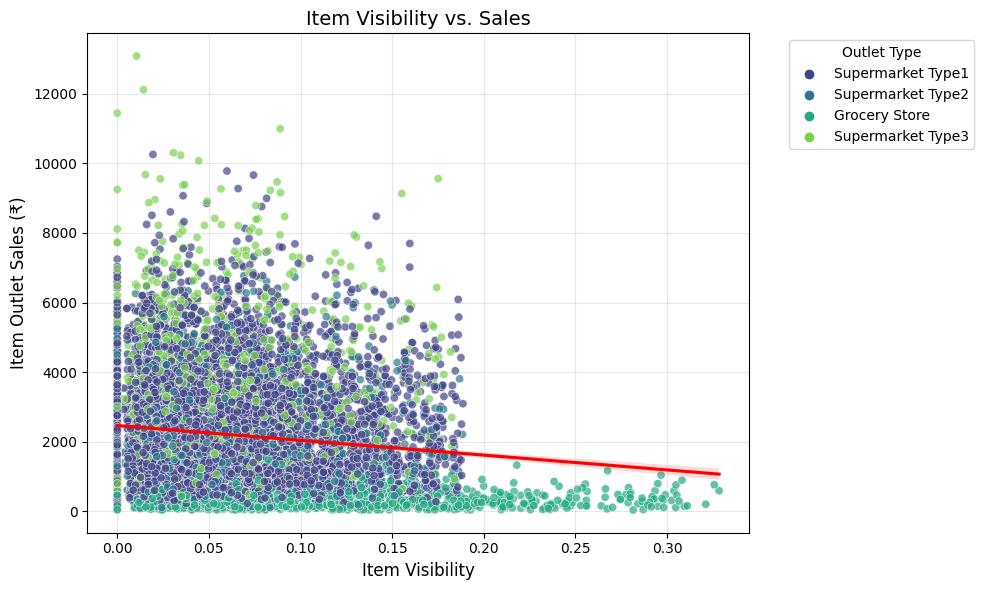

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales', data=df, hue='Outlet_Type', alpha=0.7, palette='viridis')

# Adding trend line
sns.regplot(x='Item_Visibility', y='Item_Outlet_Sales', data=df, scatter=False, color='red', line_kws={'label':'Trend Line'})

# Adding title and labels
plt.title('Item Visibility vs. Sales', fontsize=14)
plt.xlabel('Item Visibility', fontsize=12)
plt.ylabel('Item Outlet Sales (₹)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Outlet Type')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

The scatter plot with a trend line demonstrates that There is a slightly negative correlation between Item_Visibility and Item_Outlet_Sales. As visibility increases, sales tend to decrease marginally, as shown by the downward sloping trend line.
Supermarket Type 3 has the highest sales range compared to other outlet types, even at lower visibility.
Grocery Store shows consistently lower sales across all visibility ranges.

The majority of the items are clustered at lower visibility values (close to 0.0), indicating that most items are less visible, yet generate significant sales.

# Sales Distribution By Outlet Type

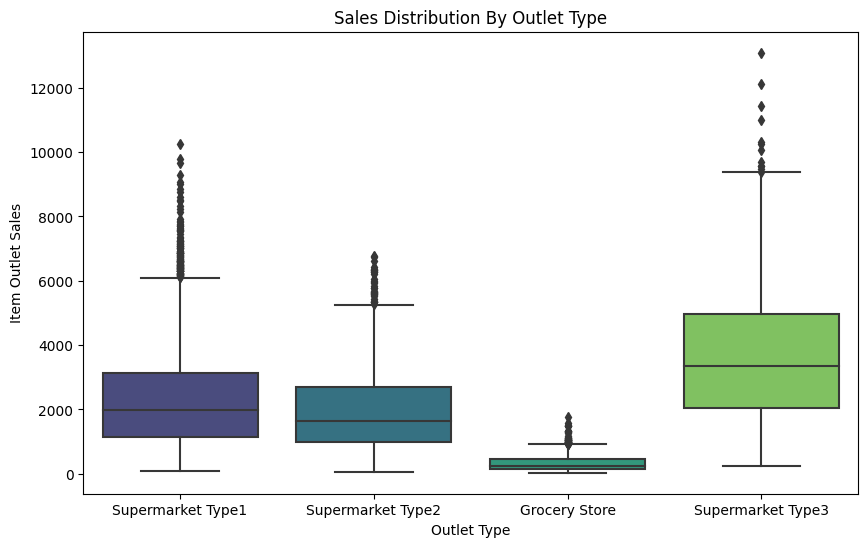

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df, palette='viridis')
plt.title('Sales Distribution By Outlet Type')  # Fixed title assignment
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales')
plt.show()

The distribution of sales across different outlet types appears to be right-skewed, with a few outliers on the higher end. This indicates that there are some outlets with significantly higher sales compared to the average.

Supermarket Type1:
The majority of sales fall within a relatively narrow range.
There are a few outliers on the higher end, suggesting some outlets within this type have exceptionally high sales.

Supermarket Type2:
The distribution is similar to Type1, with a slightly wider range of sales.
There are fewer outliers compared to Type1.

Grocery Store:
The sales are significantly lower compared to the other outlet types.
The distribution is more compact, with fewer outliers.

Supermarket Type3:
This outlet type has the highest overall sales, with a wider range compared to the other types.
There are more outliers on the higher end, indicating some outlets within this type have very high sales.


# Sales by Outlet Location Type

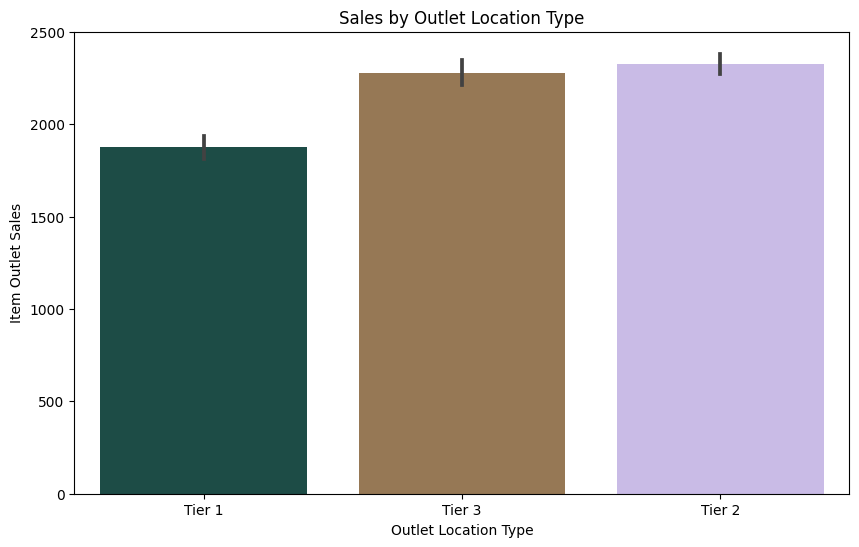

In [28]:
plt.figure(figsize=(10,6))
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df, palette='cubehelix')
plt.title('Sales by Outlet Location Type')  # Fixed title assignment
plt.xlabel('Outlet Location Type')
plt.ylabel('Item Outlet Sales')
plt.show()

The above bar plot displays the average or total sales (Item_Outlet_Sales) for each Outlet_Location_Type.
We can see 'Tier 2' location types have higher or 'Tier 1' location types have lowest sales, making it easier to compare performance across different outlet locations.

# Identifying Outliers

In [30]:
Q1 = df['Item_Outlet_Sales'].quantile(0.25)
Q3 = df['Item_Outlet_Sales'].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5* IQR
upper_bound = Q3 + 1.5* IQR
outliers = df[(df['Item_Outlet_Sales']<lower_bound) |(df['Item_Outlet_Sales']>upper_bound) ]
print(f"Number of outliers detected : {len(outliers)}")

Number of outliers detected : 186


# Visualize the Outliers

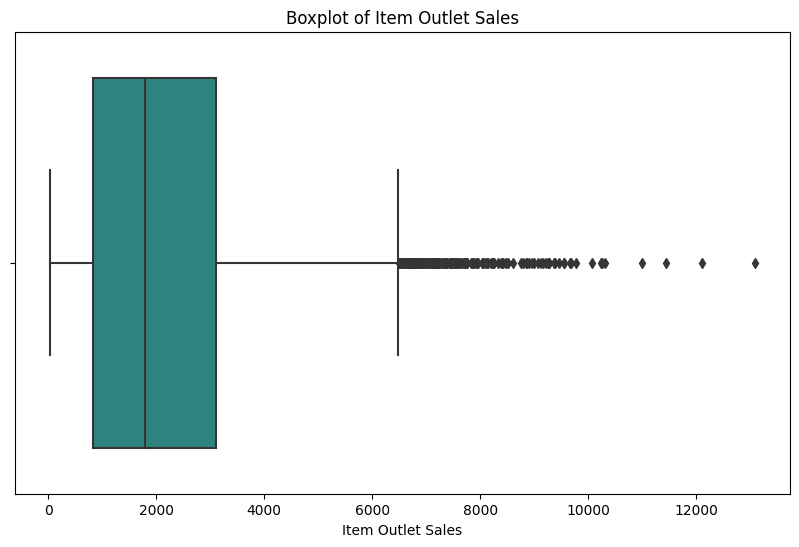

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Item_Outlet_Sales', data=df, palette='viridis')
plt.title('Boxplot of Item Outlet Sales')
plt.xlabel('Item Outlet Sales')
plt.show()

In [32]:
X_mrp = df[['Item_MRP']]
y_sales = df['Item_Outlet_Sales']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_mrp,y_sales, test_size=0.2, random_state=42)

In [34]:
model_mrp_sales = LinearRegression()
model_mrp_sales.fit(X_train, y_train)

LinearRegression()

In [35]:
y_pred = model_mrp_sales.predict(X_test)

In [36]:
y_pred = model_mrp_sales.predict(X_test)

In [37]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [38]:
print(f"R-squared: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Effect of MRP on Sales (Slope): {model_mrp_sales.coef_[0]:.4f}")
rmse = np.sqrt(1818215.3219)
print(f"Root Mean Squared Error: {rmse:.2f}")

R-squared: 0.3310
Mean Squared Error: 1818215.3219
Effect of MRP on Sales (Slope): 15.5455
Root Mean Squared Error: 1348.41


# Conclusion

# Effect of MRP on Sales (Slope): 15.5455
For every 1 unit increase in Item_MRP, the sales increase by 15.55 units.
This suggests that price has a modest but linear impact on sales. More expensive items drive higher sales in terms of revenue, but it's not the sole determining factor.

# Insights and Recommendations for Blinkit

##### Price Sensitivity:
Since the effect of MRP on sales is moderate, focus pricing strategies on products where sales are most elastic (i.e., customers respond significantly to price changes).

##### Promotional Strategy:
Higher MRP items do contribute more to sales, so promoting high-MRP items in strategic locations (like visible store displays) can be a growth area.

# Identify Underperforming Outlets (RandomForestClassifier)

In [39]:
# Ensure all categorical features are encoded
df_encoded = df.copy()

In [40]:
underperform_threshold = df_encoded['Item_Outlet_Sales'].median()
df_encoded['Underperforming'] = (df_encoded['Item_Outlet_Sales'] < underperform_threshold).astype(int)

In [41]:
# Example: Label Encoding Outlet_Size and Outlet_Type
le_outlet_size = LabelEncoder()
le_outlet_type = LabelEncoder()

In [42]:
df_encoded['Outlet_Size_Encoded'] = le_outlet_size.fit_transform(df_encoded['Outlet_Size'])
df_encoded['Outlet_Type_Encoded'] = le_outlet_type.fit_transform(df_encoded['Outlet_Type'])

In [43]:
# Features and Target for Outlet Performance model
X_outlet = df_encoded[['Outlet_Size_Encoded', 'Outlet_Type_Encoded', 'Outlet_Establishment_Year', 'Item_MRP', 'Item_Visibility']]
y_outlet = df_encoded['Underperforming']  

In [44]:
X_train_outlet, X_test_outlet, y_train_outlet, y_test_outlet = train_test_split(X_outlet, y_outlet, test_size=0.2, random_state=42)

In [45]:
# Step 5: Train the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_outlet, y_train_outlet)

RandomForestClassifier(random_state=42)

In [46]:
# Step 6: Make predictions
y_pred_outlet = rf_classifier.predict(X_test_outlet)

In [47]:
# Step 7: Evaluate the model
accuracy = accuracy_score(y_test_outlet, y_pred_outlet)
print(f"Outlet Performance Model Accuracy: {accuracy:.4f}")

Outlet Performance Model Accuracy: 0.8006


In [48]:
# Optional: Feature importance
feature_importances = pd.DataFrame({
    'Feature': X_outlet.columns,
    'Importance': rf_classifier.feature_importances_
}).sort_values(by='Importance', ascending=False)

In [49]:
print("\nFeature Importances:")
print(feature_importances)


Feature Importances:
                     Feature  Importance
3                   Item_MRP    0.553466
4            Item_Visibility    0.237413
1        Outlet_Type_Encoded    0.147150
2  Outlet_Establishment_Year    0.040033
0        Outlet_Size_Encoded    0.021937


# Summary of Analysis and Recommendations

# Model Accuracy: 80.06%—effective at identifying underperforming outlets.
#### Key Insights:

Item_MRP (55.35%): Higher-priced items strongly impact sales.
        Action: Promote high-MRP products, offer discounts, and create bundles.

Item_Visibility (23.74%): Visibility boosts sales.
        Action: Improve product placement and online presentation.

Outlet_Type (14.71%): Supermarkets perform better than smaller formats.
        Action: Upgrade smaller outlets to supermarket formats if possible.

Outlet_Establishment_Year (4.00%): Age of outlet has minimal impact.
        Action: Focus on newer outlets with targeted promotions.

Outlet_Size (2.19%): Minimal impact on sales.
        Action: Prioritize other factors over size.

#### Recommendations:

    Promote high-MRP items to boost sales in underperforming outlets.
    Enhance product visibility through better shelf space and online marketing.
    Upgrade outlet types where feasible to offer a wider product range.
    Invest in newer outlets with targeted marketing to drive growth.

Overall: Focus on pricing, product placement, and outlet type to improve performance.


# Recommendations for Blinkit

Promote High-MRP Items:
        Focus on promoting high-MRP items in underperforming outlets. Adjust pricing or bundle offers to attract more sales.

Enhance Product Visibility:
        Improve the visibility of key products, especially those with high sales potential but low visibility.

Upgrade Outlet Types:
        Consider upgrading some underperforming grocery stores to supermarket-type outlets where feasible.

Target Newer Outlets:
        Invest more in promoting newer outlets since age has minimal impact but could influence customer perception.

# Focus Promotions on Items with Low Visibility and High Predicted Sales (RandomForestRegressor)

In [53]:
# Features: Visibility and MRP
X_visibility = df[['Item_Visibility', 'Item_MRP']]
y_sales_visibility = df['Item_Outlet_Sales']

In [54]:
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_visibility, y_sales_visibility, test_size=0.2, random_state=42)

In [55]:
# Random Forest Regressor Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_vis, y_train_vis)

RandomForestRegressor(random_state=42)

In [56]:
# Predictions
y_pred_vis = rf_model.predict(X_test_vis)

In [57]:
# Evaluation
mse_vis = mean_squared_error(y_test_vis, y_pred_vis)
r2_vis = r2_score(y_test_vis, y_pred_vis)
print(f"R-squared (Visibility Model): {r2_vis:.4f}")
print(f"Mean Squared Error (Visibility Model): {mse_vis:.4f}")

R-squared (Visibility Model): 0.2494
Mean Squared Error (Visibility Model): 2040122.2292


In [58]:
# Identify low visibility, high predicted sales items
low_visibility_threshold = 0.05
high_sales_threshold = y_sales.mean() * 1.5  # Example threshold

In [59]:
low_vis_high_sales = X_test_vis[(X_test_vis['Item_Visibility'] < low_visibility_threshold) & (y_pred_vis > high_sales_threshold)]
print("Items with Low Visibility but High Predicted Sales:")
print(low_vis_high_sales)

Items with Low Visibility but High Predicted Sales:
      Item_Visibility  Item_MRP
4313         0.029107  240.5222
2112         0.043852  182.6950
4087         0.000000  228.4668
4562         0.048207  188.0556
4983         0.014457  184.7950
...               ...       ...
2127         0.019537  170.0474
3265         0.019019  238.7248
1691         0.000000  196.3426
4824         0.013665  257.7304
4205         0.038532  210.6586

[156 rows x 2 columns]


# Summary of Analysis and Recommendations for Blinkit

Model Performance:

R-squared: 0.2494 (indicating moderate explanatory power)
    Mean Squared Error: 2040224.3989

Key Insights:

Low Visibility but High Predicted Sales: Identified items that have low visibility (below 0.05) but high predicted sales potential (MRP). These items could be valuable but are not currently receiving adequate attention.

# Business Recommendations:

Promotional Campaigns:
Highlight high-MRP, low-visibility items with targeted promotions (e.g., online banners and in-store displays).
Offer special discounts to draw customer interest.

Enhanced Placement:
Physically position these items in prominent spots within the store to improve visibility.
Feature them on the homepage or "featured" sections of the online platform.

Bundling Strategy:
Bundle these items with popular or high-visibility products to encourage sales through cross-promotion.

Performance Monitoring:
Track and analyze sales data from these visibility-focused strategies to refine and optimize campaigns.

Overall: Prioritize high-MRP, low-visibility items for strategic promotions and optimal placement to maximize sales potential.